# PROJECT DESCRIPTION

This Project... 

Link: https://www.kaggle.com/competitions/store-sales-time-series-forecasting/overview

About Business case:
1. Time Series - Store Sales
2. Grocery retailer

Context:
1. Accuracy forecast grocery store
2. Prevent overstock and lost customer (out of stock)
3. Seasonal

# 0.0 IMPORTAÇÕES E DEFINIÇÕES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

## 0.1 Helper Functions

In [2]:
def read_files(path, extension):

    all_files = os.listdir(path)
    files = []

    for file in all_files:
        file_extension = os.path.splitext(file)[1]
        if file_extension.lower() == extension:
            files.append(file)

    files_path = [file.replace(extension,'') for file in files]
    files_name = ['df_' + file + '_raw' for file in files_path]

    for x in range(len(files_path)):
        try:
            globals()[files_name[x]] = pd.read_csv(path + '/' + files_path[x] + extension, parse_dates=['date'])
            print('Global varieable created -> {}'.format(files_name[x]))
        except:
            globals()[files_name[x]] = pd.read_csv(path + '/' + files_path[x] + extension)
            print('Global varieable created -> {}'.format(files_name[x]))
    return None

def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = (20,8)
    plt.rcParams['font.size'] = 24
    
    pd.options.display.max_columns = None
    pd.options.display.max_rows = 100
    pd.set_option('display.expand_frame_repr', False)
    pd.set_option('display.float_format', lambda x: '%.2f' % x)
    
    sns.set()

jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 0.2 Load Data

In [34]:
path = ('../data/raw/store-sales-time-series-forecasting')

read_files(path,'.csv')

Global varieable created -> df_train_raw
Global varieable created -> df_test_raw
Global varieable created -> df_holidays_events_raw
Global varieable created -> df_stores_raw
Global varieable created -> df_transactions_raw
Global varieable created -> df_oil_raw


In [35]:
df_holidays_regional_raw.shape

(176, 3)

## 0.3 Merge Data

In [40]:
national_list = df_holidays_events_raw[df_holidays_events_raw['locale'] == 'National'][['date']].values

In [52]:
regional_dict = df_holidays_events_raw[df_holidays_events_raw['locale'] != 'National'][['date','city']].set_index('city')
regional_dict = regional_dict.groupby('city')['date'].apply(list).to_dict()

In [ ]:
df1 = pd.merge(df_train_raw, df_stores_raw, on='store_nbr', how='left')

df1['national_holiday'] = df1['date'].apply(lambda x: 1 if x in national_list else 0)

df1['regional_holiday'] = df1.apply(lambda x: 1 if x['city'] in regional_dict.keys() and x['date'] in regional_dict[x['city']] else 0, axis=1)

In [97]:
oil_dict = df_oil_raw.set_index('date')

oil_dict = oil_dict['dcoilwtico'].to_dict()

In [98]:
df1['oil_price'] = df1['date'].apply(lambda x: oil_dict[x] if x in oil_dict.keys() else np.nan)

# 1.0 DESCRIÇÕES DOS DADOS

In [113]:
df1 = df1.sort_values('date', ascending=True).reset_index(drop=True).copy()
df1.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,national_holiday,regional_holiday,oil_price
0,0,2013-01-01,1,AUTOMOTIVE,0.00,0,Quito,Pichincha,D,13,1,0,NaN
1,890,2013-01-01,33,SEAFOOD,0.00,0,Quevedo,Los Rios,C,3,1,0,NaN
2,2,2013-01-01,1,BEAUTY,0.00,0,Quito,Pichincha,D,13,1,0,NaN
3,3,2013-01-01,1,BEVERAGES,0.00,0,Quito,Pichincha,D,13,1,0,NaN
4,4,2013-01-01,1,BOOKS,0.00,0,Quito,Pichincha,D,13,1,0,NaN


In [102]:
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of cols: {}'.format(df1.shape[1]))

Number of rows: 3000888
Number of cols: 13


## 1.1. Data types

In [115]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 13 columns):
 #   Column            Dtype         
---  ------            -----         
 0   id                int64         
 1   date              datetime64[ns]
 2   store_nbr         int64         
 3   family            object        
 4   sales             float64       
 5   onpromotion       int64         
 6   city              object        
 7   state             object        
 8   type              object        
 9   cluster           int64         
 10  national_holiday  int64         
 11  regional_holiday  int64         
 12  oil_price         float64       
dtypes: datetime64[ns](1), float64(2), int64(6), object(4)
memory usage: 297.6+ MB


In [116]:
df1['date'] = pd.to_datetime(df1['date'])

## 1.2 Check NA

In [117]:
df1.isnull().sum()

id                       0
date                     0
store_nbr                0
family                   0
sales                    0
onpromotion              0
city                     0
state                    0
type                     0
cluster                  0
national_holiday         0
regional_holiday         0
oil_price           928422
dtype: int64

## 1.4 Fill NA

In [118]:
df1['national_holiday'] = df1['national_holiday'].fillna(0)
df1['regional_holiday'] = df1['regional_holiday'].fillna(0)

In [120]:
df1['oil_price'] = df1['oil_price'].fillna(method='ffill')
df1['oil_price'] = df1['oil_price'].fillna(method='bfill')

In [121]:
df5.isnull().sum()

id                  0
date                0
store_nbr           0
family              0
sales               0
onpromotion         0
city                0
state               0
type                0
cluster             0
national_holiday    0
regional_holiday    0
dcoilwtico          0
dtype: int64

In [122]:
df1.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,national_holiday,regional_holiday,oil_price
0,0,2013-01-01,1,AUTOMOTIVE,0.00,0,Quito,Pichincha,D,13,1,0,93.14
1,890,2013-01-01,33,SEAFOOD,0.00,0,Quevedo,Los Rios,C,3,1,0,93.14
2,2,2013-01-01,1,BEAUTY,0.00,0,Quito,Pichincha,D,13,1,0,93.14
3,3,2013-01-01,1,BEVERAGES,0.00,0,Quito,Pichincha,D,13,1,0,93.14
4,4,2013-01-01,1,BOOKS,0.00,0,Quito,Pichincha,D,13,1,0,93.14


## 1.5 Descriptive Statistical

In [123]:
num_attributes = df1.select_dtypes(include=['int64','float64'])

cat_attributes = df1.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

### 1.5.1 Numerical Attributes

In [124]:
# Central tedency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# concat
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,0.00,3000887.00,3000887.00,1500443.50,1500443.50,866281.75,-0.00,-1.20
1,store_nbr,1.00,54.00,53.00,27.50,27.50,15.59,0.00,-1.20
2,sales,0.00,124717.00,124717.00,357.78,11.00,1102.00,7.36,154.56
3,onpromotion,0.00,741.00,741.00,2.60,0.00,12.22,11.17,240.87
4,cluster,1.00,17.00,16.00,8.48,8.50,4.65,0.04,-1.26
5,national_holiday,0.00,1.00,1.00,0.08,0.00,0.28,2.98,6.87
6,regional_holiday,0.00,1.00,1.00,0.00,0.00,0.06,15.56,240.12
7,oil_price,26.19,110.62,84.43,67.92,53.41,25.67,0.31,-1.62


### 1.5.2 Categorical Attributes

In [125]:
cat_attributes.apply(lambda x: x.unique().shape[0])

family    33
city      22
state     16
type       5
dtype: int64

## 1.6 DataViz 

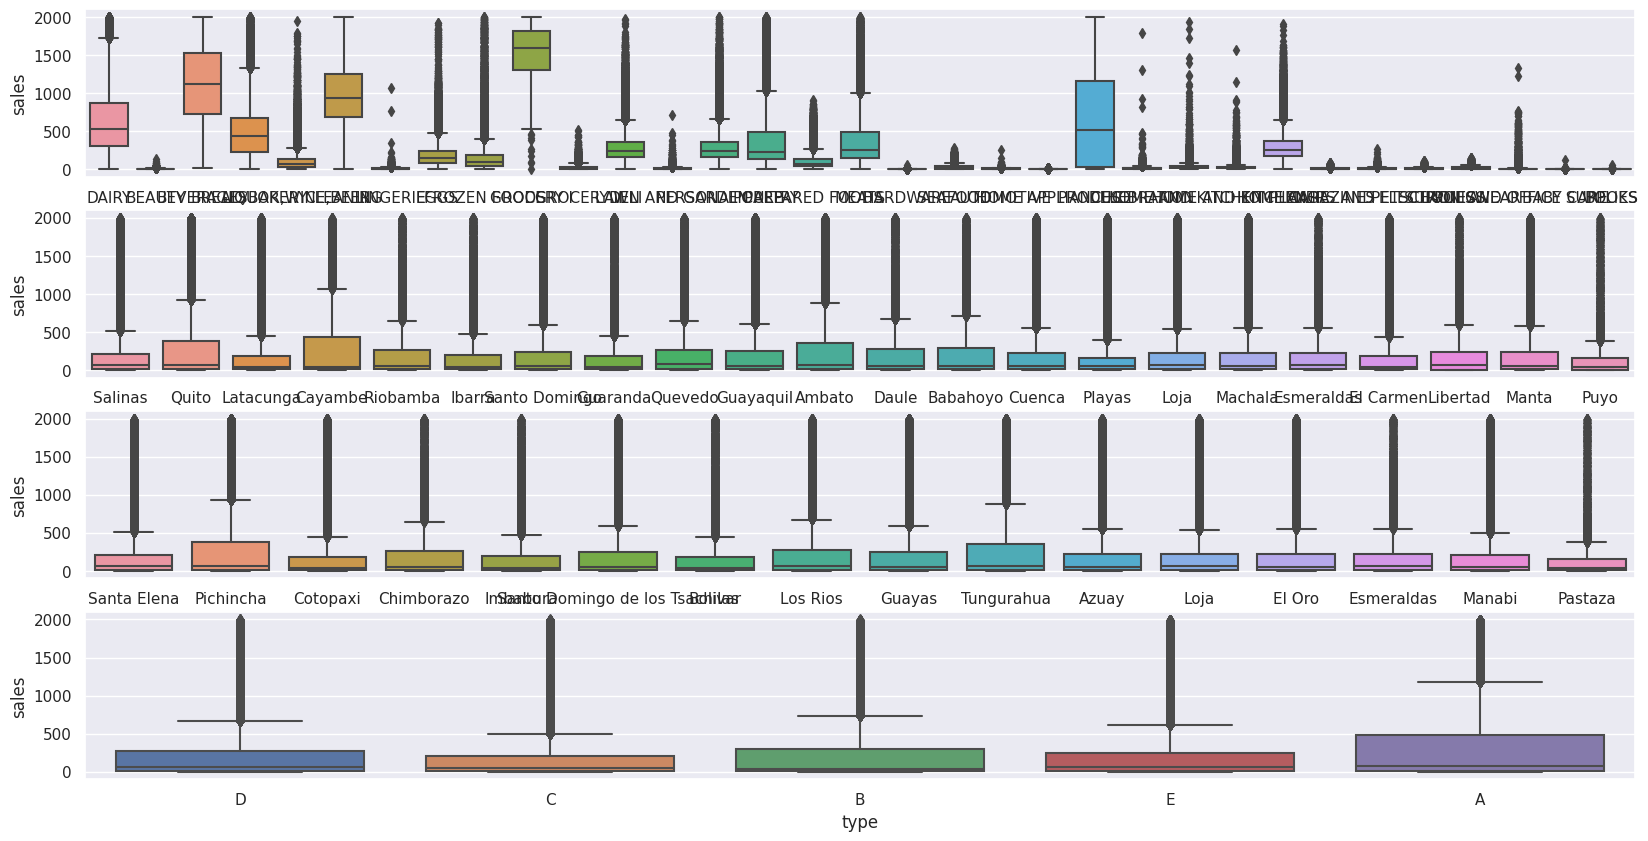

In [126]:
aux = df1[(df1['sales'] > 0) & (df1['sales'] < 2000)]

plt.figure(figsize=[20,10])
plt.subplot(4,1,1)
sns.boxplot(x='family',y='sales', data=aux)

plt.subplot(4,1,2)
sns.boxplot(x='city',y='sales', data=aux)

plt.subplot(4,1,3)
sns.boxplot(x='state',y='sales', data=aux)

plt.subplot(4,1,4)
sns.boxplot(x='type',y='sales', data=aux);

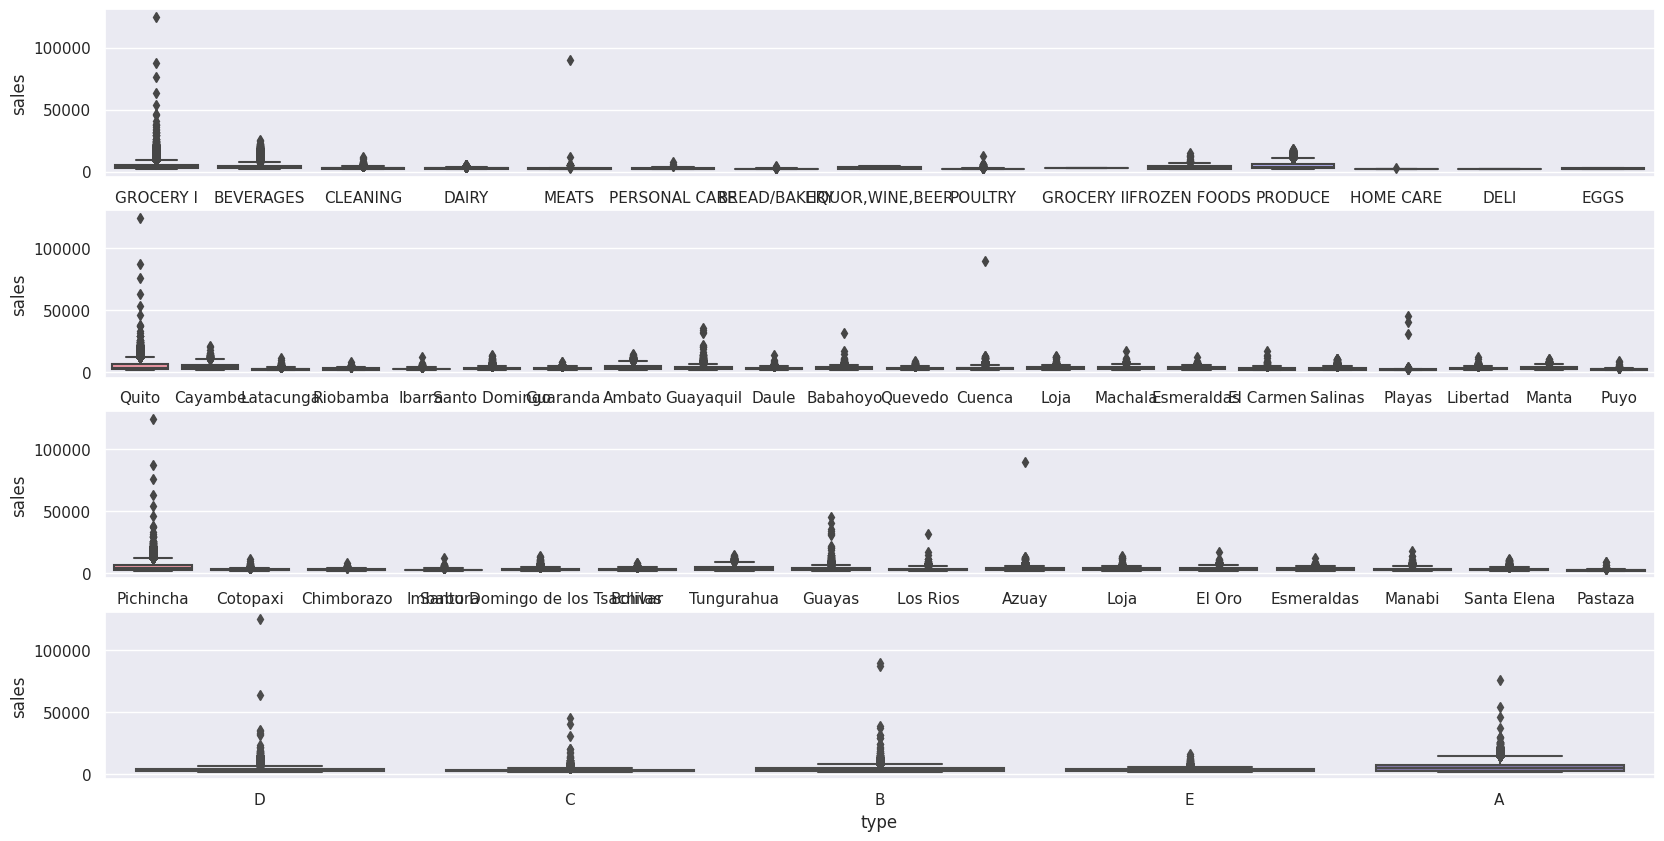

In [127]:
aux = df1[(df1['sales'] >= 2000)]

plt.figure(figsize=[20,10])
plt.subplot(4,1,1)
sns.boxplot(x='family',y='sales', data=aux)

plt.subplot(4,1,2)
sns.boxplot(x='city',y='sales', data=aux)

plt.subplot(4,1,3)
sns.boxplot(x='state',y='sales', data=aux)

plt.subplot(4,1,4)
sns.boxplot(x='type',y='sales', data=aux);

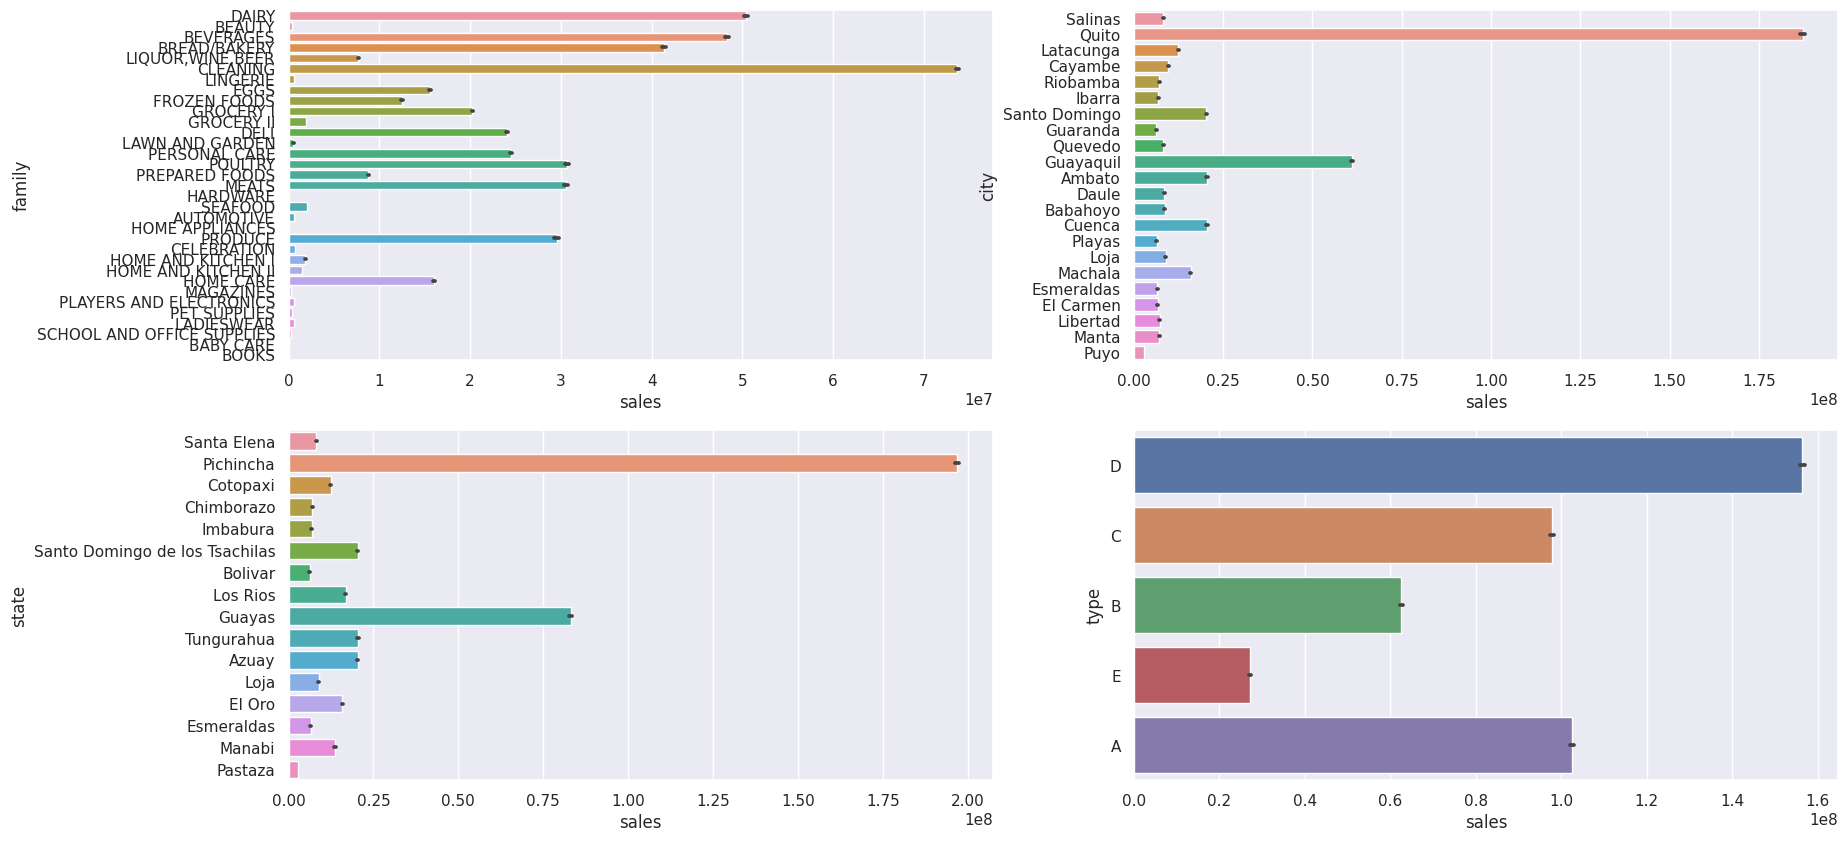

In [128]:
aux = df1[(df1['sales'] > 0) & (df1['sales'] < 2000)]

plt.figure(figsize=[20,10])
plt.subplot(2,2,1)
sns.barplot(y='family',x='sales', data=aux, estimator=sum)

plt.subplot(2,2,2)
sns.barplot(y='city',x='sales', data=aux, estimator=sum)

plt.subplot(2,2,3)
sns.barplot(y='state',x='sales', data=aux, estimator=sum)

plt.subplot(2,2,4)
sns.barplot(y='type',x='sales', data=aux, estimator=sum);

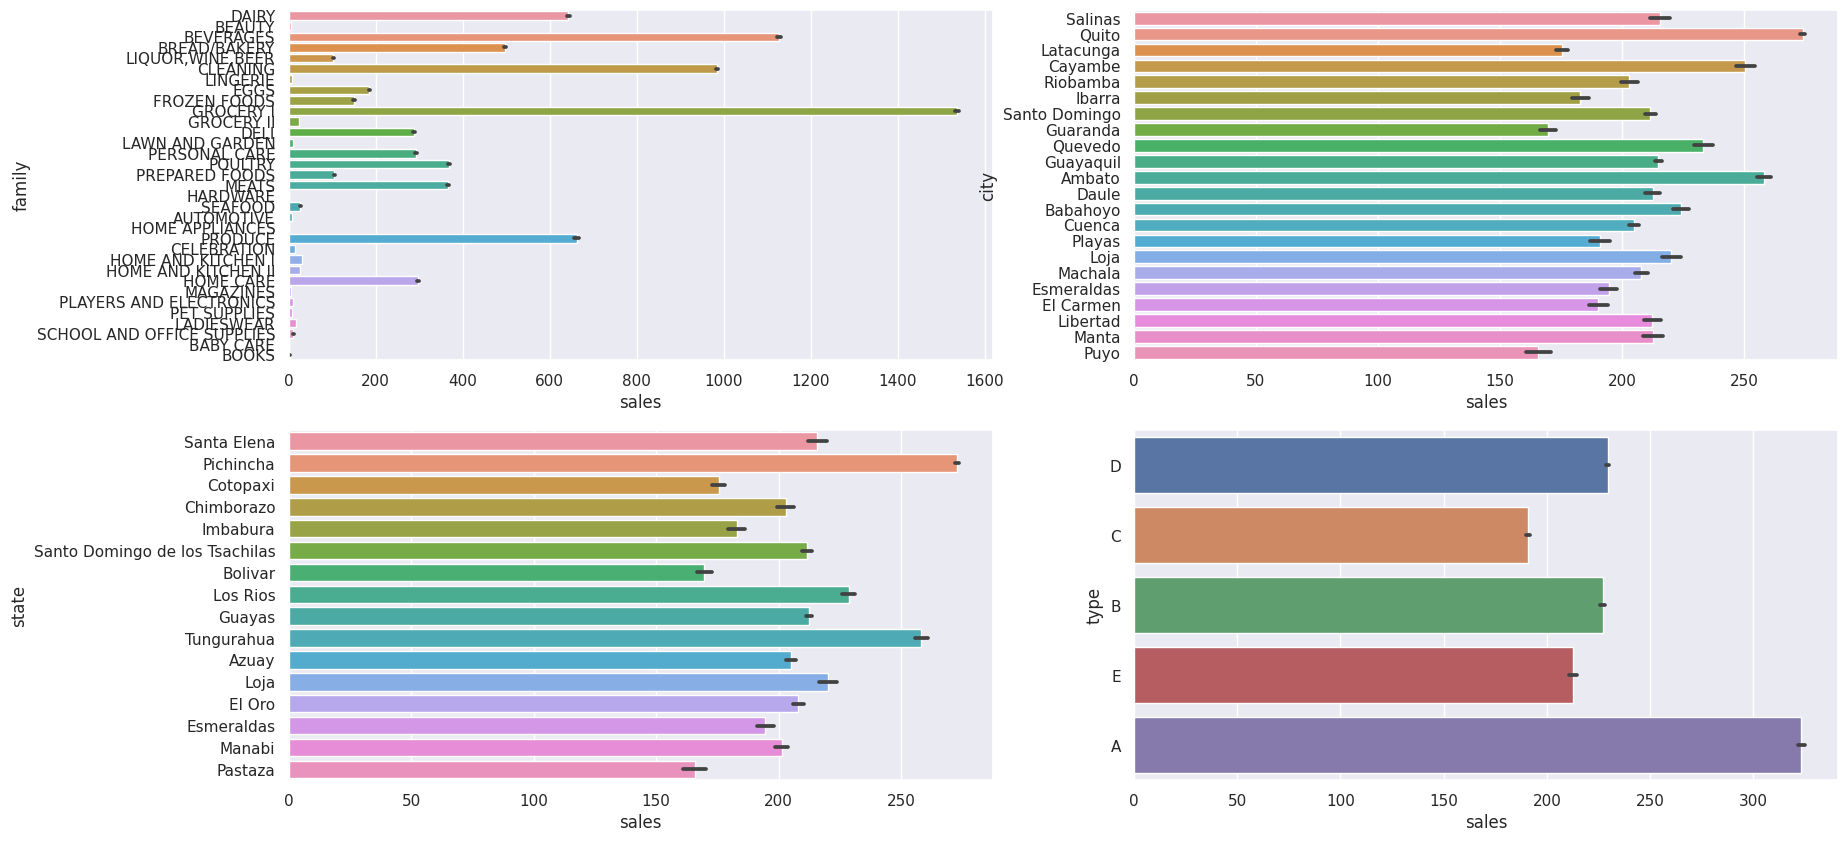

In [129]:
aux = df1[(df1['sales'] > 0) & (df1['sales'] < 2000)]

plt.figure(figsize=[20,10])
plt.subplot(2,2,1)
sns.barplot(y='family',x='sales', data=aux, estimator='mean')

plt.subplot(2,2,2)
sns.barplot(y='city',x='sales', data=aux, estimator='mean')

plt.subplot(2,2,3)
sns.barplot(y='state',x='sales', data=aux, estimator='mean')

plt.subplot(2,2,4)
sns.barplot(y='type',x='sales', data=aux, estimator='mean');

<AxesSubplot:xlabel='date', ylabel='sales'>

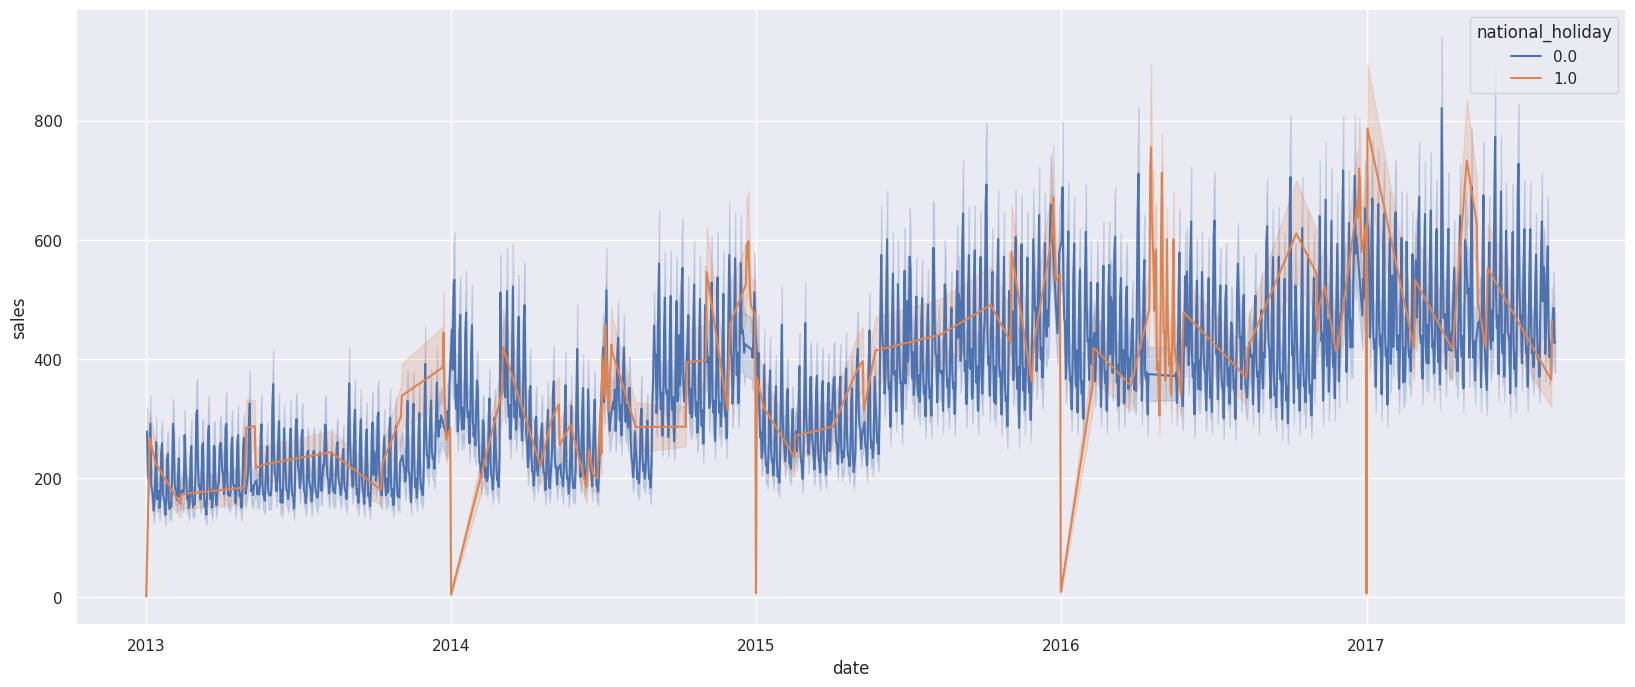

In [130]:
sns.lineplot(x="date", y="sales",
             hue="national_holiday",
             data=df5)

# 2.0 ENGENHARIA DE PARÂMETROS

# 3.0 ANÁLISE EXPLORATÓRIA DE DADOS

# 4.0 SELEÇÃO DE PARÂMETROS

# 5.0 PREPARAÇÃO DOS DADOS

# 6.0 FINE-TUNNING DE HIPERPARÂMETROS

# 7.0 MODELAGEM

# 8.0 ANÁLISE DE MÉTRICAS